# Import data and Required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2

In [2]:
df=pd.read_csv('supply_chain_data.csv')

# Show top 5 Record

In [3]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


# Shape of the dataset

In [4]:
df.shape

(100, 24)

# Check data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

# Check missing values

In [6]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

# Check duplicates values

In [7]:
df.duplicated().sum()

0

# Checking the number of unique values of each column

In [8]:
df.nunique()

Product type                 3
SKU                        100
Price                      100
Availability                63
Number of products sold     96
Revenue generated          100
Customer demographics        4
Stock levels                65
Lead times                  29
Order quantities            61
Shipping times              10
Shipping carriers            3
Shipping costs             100
Supplier name                5
Location                     5
Lead time                   29
Production volumes          96
Manufacturing lead time     30
Manufacturing costs        100
Inspection results           3
Defect rates               100
Transportation modes         4
Routes                       3
Costs                      100
dtype: int64

# Check statistics of data set

In [9]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


Insight:

* from above descriptiob product price max are 99.171 and min are 1.6999
* shipping times min 1 minutes and max 10 minutes
* min order quantities 1 no and max 96 nos
* Revenue generated max are 9866.64 & min 1061.61 
* Defect rates are max 4.939 & min 0.01860

# EDA

Text(0.5, 1.0, 'Product type')

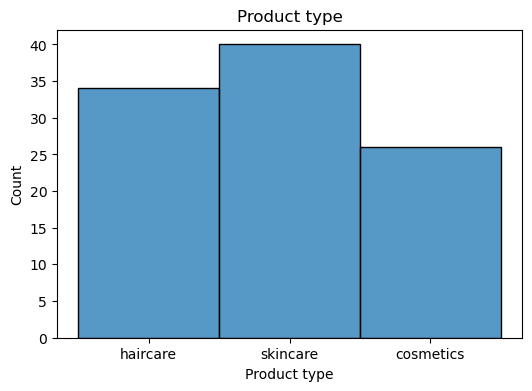

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='Product type')
plt.title('Product type')

<Axes: xlabel='Price', ylabel='Count'>

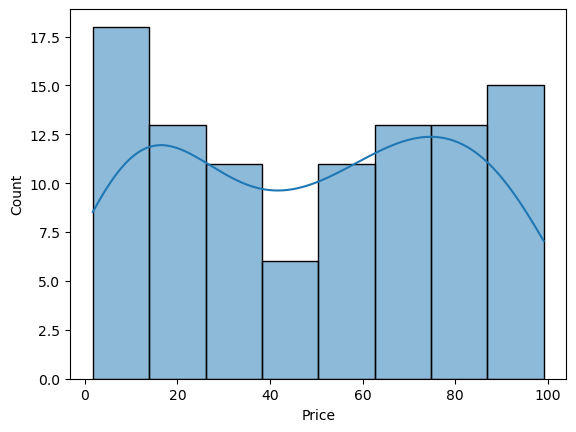

In [11]:
sns.histplot(data=df,x='Price',kde=True)

<Axes: xlabel='Price', ylabel='Number of products sold'>

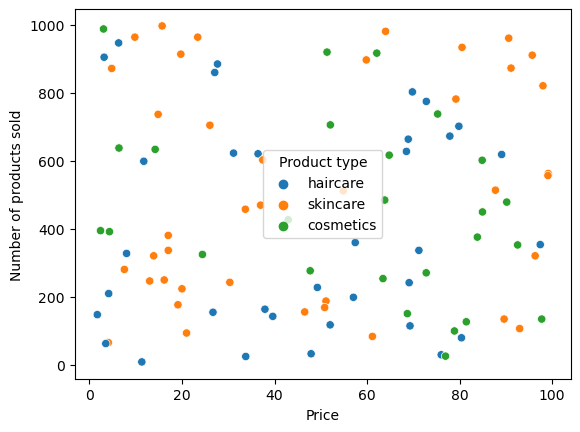

In [12]:
sns.scatterplot(data=df,x='Price',y='Number of products sold',hue='Product type')

In [13]:
df.groupby('Product type').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Product type,,,,,,,,
cosmetics,26.0,57.361058,30.423912,2.397275,44.147347,64.311917,80.821379,97.760086
haircare,34.0,46.014279,28.850845,1.699976,26.796123,48.588874,69.678712,97.446947
skincare,40.0,47.259329,33.337844,4.078333,17.033205,37.228419,82.344926,99.171329


Insight:
 Skincare product types max price 99.17 & count are 40

<Axes: xlabel='Price', ylabel='Product type'>

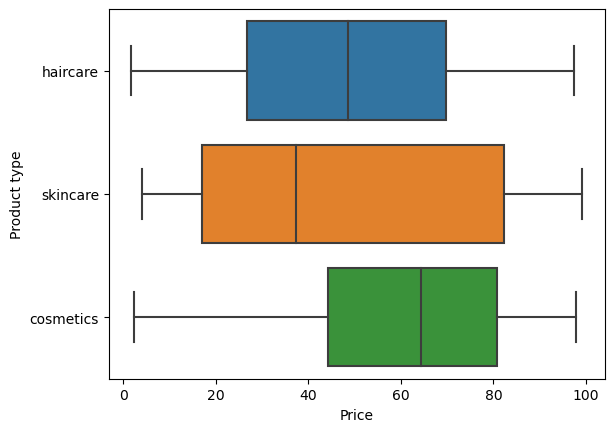

In [14]:
sns.boxplot(data=df,x='Price',y='Product type')

<Axes: xlabel='Customer demographics', ylabel='Count'>

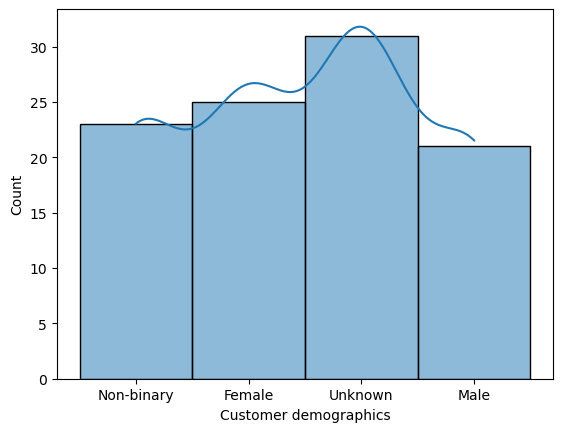

In [15]:
sns.histplot(data=df,x='Customer demographics',kde=True)

<Axes: xlabel='Location', ylabel='Count'>

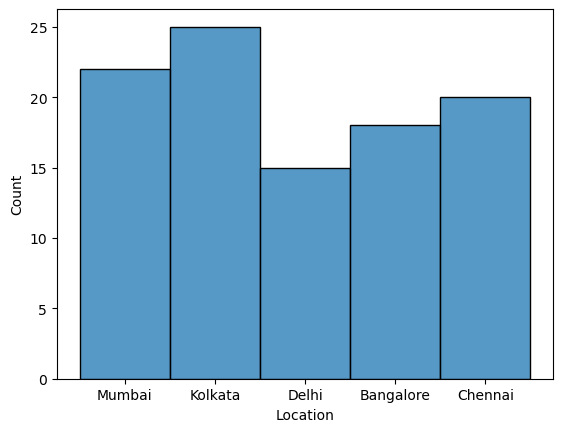

In [16]:
sns.histplot(data=df,x='Location')

Insight: Kolkata has max counts of order

Text(0.5, 1.0, 'price of Product type in Location')

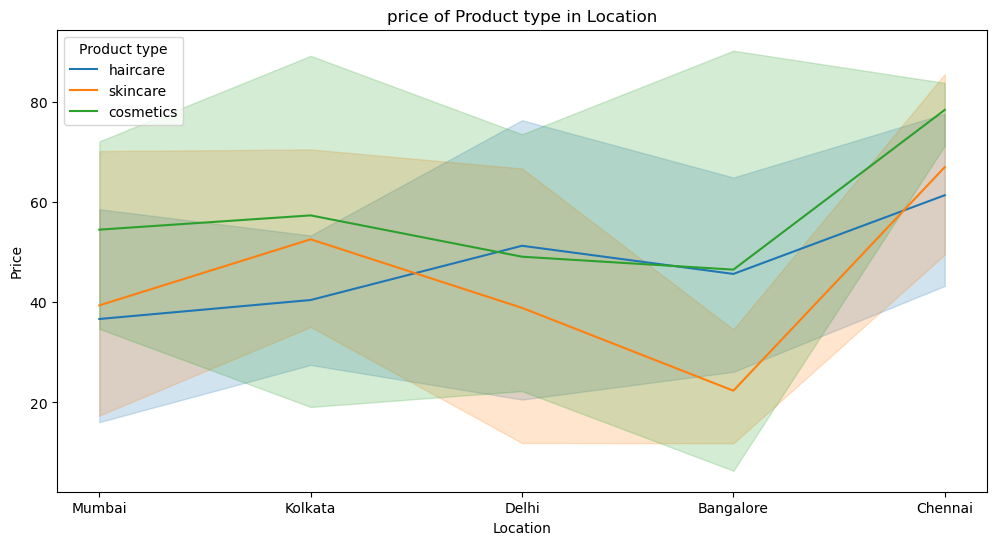

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,y='Price',x='Location',hue='Product type')
plt.title('price of Product type in Location')

In [18]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


<Axes: xlabel='Transportation modes', ylabel='Count'>

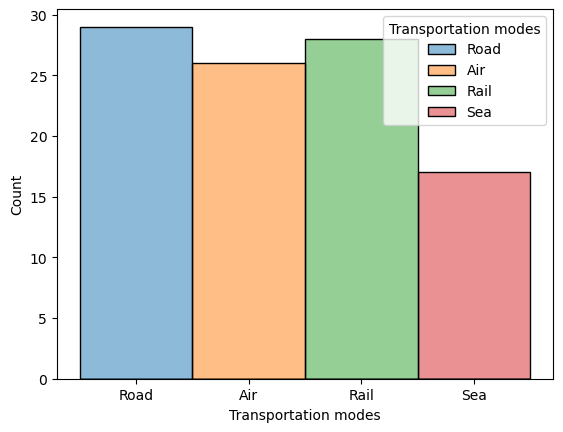

In [19]:
sns.histplot(data=df,x='Transportation modes',hue='Transportation modes')

Insight:  Road transportation modes high count and sea has less

<Axes: xlabel='Product type', ylabel='Defect rates'>

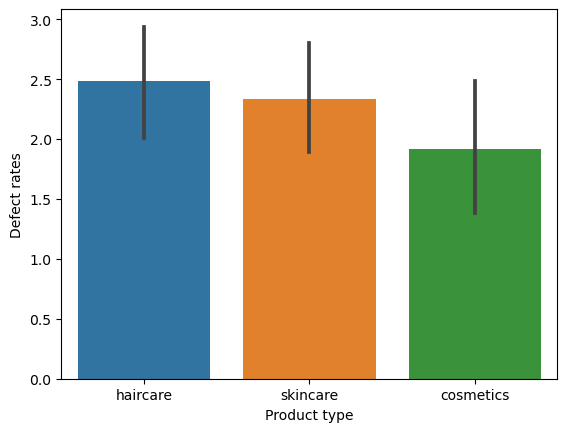

In [20]:
sns.barplot(data=df,x='Product type',y='Defect rates')

Insight : Haircare product are high Defect rates

<Axes: xlabel='Product type', ylabel='Manufacturing costs'>

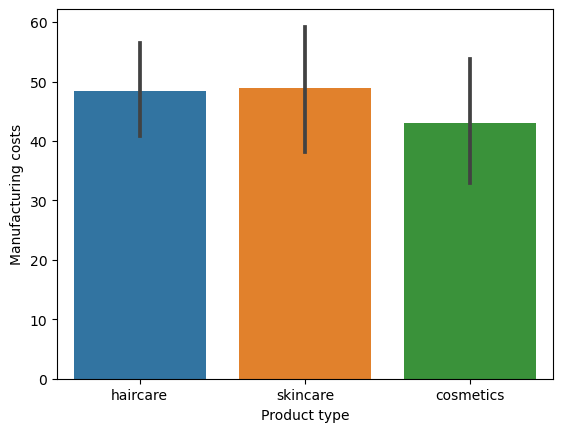

In [21]:
sns.barplot(data=df,x='Product type',y='Manufacturing costs')

<Axes: xlabel='Product type', ylabel='Manufacturing lead time'>

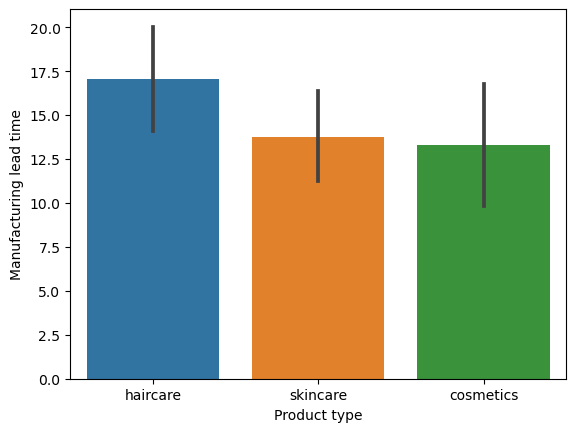

In [22]:
sns.barplot(data=df,x='Product type',y='Manufacturing lead time')

Insight :  haicareproduct types are are high Manufacturing lead time

<Axes: xlabel='Product type', ylabel='Availability'>

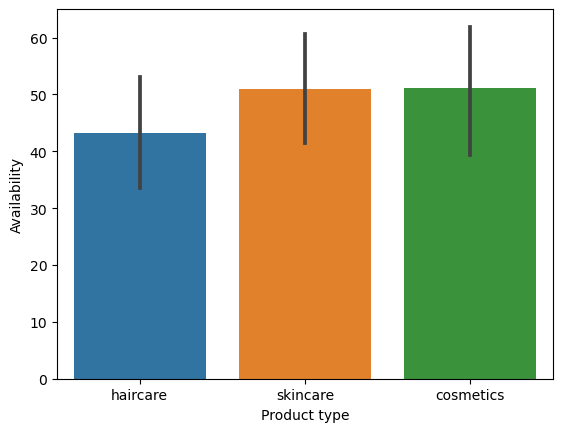

In [23]:
sns.barplot(data=df,x='Product type',y='Availability')

Insight : skincare and cosmetics product type more Availability comapare to Haircare product type